# 공통파일


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
from os.path import join
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path_son = 'datathon_energy/'
file_path_hea = '/content/drive/MyDrive/Code/Datathon/energy/energy' 

train = pd.read_csv('/content/drive/MyDrive/Code/Datathon/energy/energy/train.csv', encoding='cp949')  # 파일 path 바꿔가면서 쓰시면 될 거 같아요
test = pd.read_csv('/content/drive/MyDrive/Code/Datathon/energy/energy/test.csv', encoding='cp949')

#train = pd.read_csv('~/_Python/Exploration/data/energy/train.csv', encoding = "cp949")
#test = pd.read_csv('~/_Python/Exploration/data/energy/test.csv', encoding = "cp949")
train.columns = ['num', 'date', 'use_electric', 'temperature', 'wind_speed', 'humidity', 'precipitation', 'sunshine', 'operation', 'solar_power']
train['date']= pd.to_datetime(train['date'])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. 데이터 분석

In [ ]:
train.shape

(122400, 10)

In [ ]:
train.head()

,num,date,use_electric,temperature,wind_speed,humidity,precipitation,sunshine,operation,solar_power
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [ ]:
train.columns

Index(['num', 'date', 'use_electric', 'temperature', 'wind_speed', 'humidity',
       'precipitation', 'sunshine', 'operation', 'solar_power'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num            122400 non-null  int64         
 1   date           122400 non-null  datetime64[ns]
 2   use_electric   122400 non-null  float64       
 3   temperature    122400 non-null  float64       
 4   wind_speed     122400 non-null  float64       
 5   humidity       122400 non-null  float64       
 6   precipitation  122400 non-null  float64       
 7   sunshine       122400 non-null  float64       
 8   operation      122400 non-null  float64       
 9   solar_power    122400 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 9.3 MB


In [ ]:
train.describe()

,num,use_electric,temperature,wind_speed,humidity,precipitation,sunshine,operation,solar_power
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000


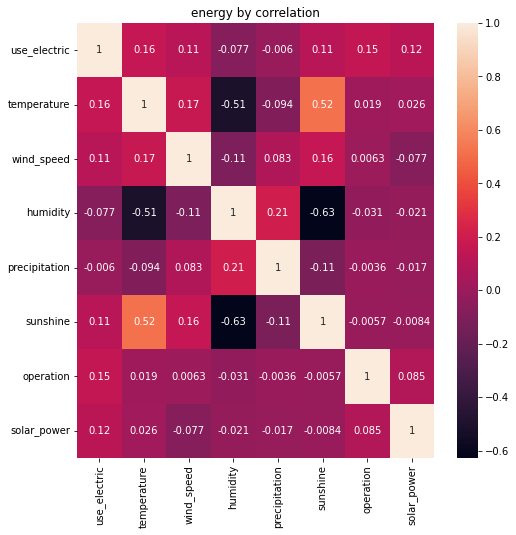

In [ ]:
corr_df= train[['use_electric', 'date', 'temperature', 'wind_speed', 'humidity', 'precipitation', 'sunshine', 'operation', 'solar_power']]

# 한글 폰트 사용을 위해서 세팅
'''
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
'''

plt.figure(figsize=(8,8))

sns.heatmap(data=corr_df.corr(), annot=True)
plt.title('energy by correlation')
plt.show()

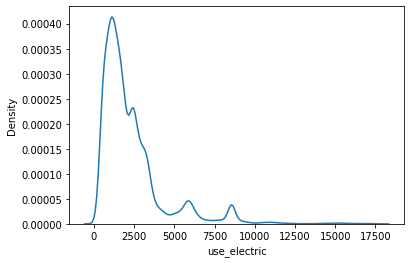

In [ ]:
sns.kdeplot(data=train['use_electric'])
plt.show()

In [ ]:
train['use_electric'].skew()  #왜도 : 분포가 대칭을 벗어나 치우친 정도

2.569979214229397

In [ ]:
train['use_electric'].kurt()  # 첨도 : 뽀족한 정도

8.998589167827355

## feature 별 전력사용량과의 관계

In [ ]:
# CATE_COLS = ['num', "mgrp", 'holiday', 'dow', 'cluster', 'hot', 'nelec_cool_flag', 'solar_flag']
# for col in CATE_COLS:
#     df[col] = df[col].astype(str).astype('category')





In [ ]:
train.head()

,num,date,use_electric,temperature,wind_speed,humidity,precipitation,sunshine,operation,solar_power
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


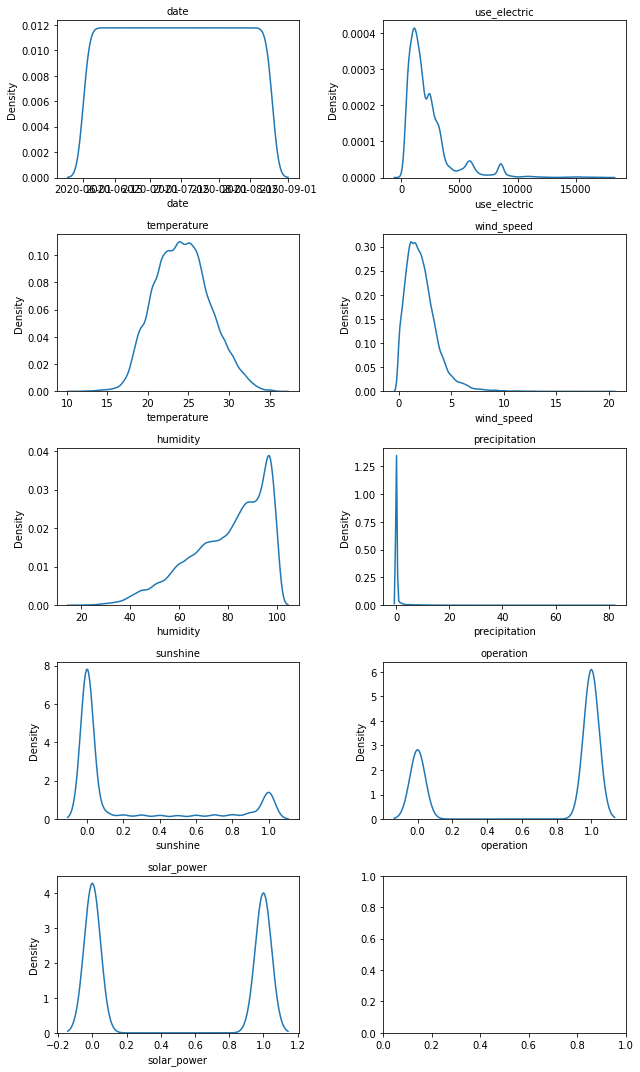

In [ ]:
skew_columns = ['date', 'use_electric', 'temperature', 'wind_speed', 'humidity', 'precipitation', 'sunshine', 'operation', 'solar_power']

fig, ax = plt.subplots(5, 2, figsize=(9, 15), tight_layout=True)

count = 0
for row in range(5):
    for col in range(2):
        if count == 9:
            break
        sns.kdeplot(data=train[skew_columns[count]], ax=ax[row][col] )
        ax[row][col].set_title(skew_columns[count], fontsize=10)
        count += 1

In [ ]:
## 개별 컬럼 분석

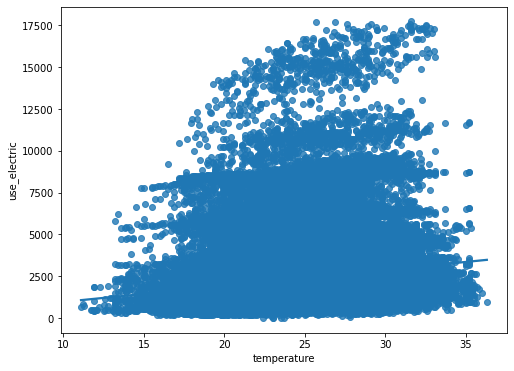

In [ ]:
#'date', 'use_electric', 'temperature', 'wind_speed', 'humidity', 'precipitation', 'sunshine', 'operation', 'solar_power'

data = pd.concat([train['use_electric'], train['temperature']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='temperature', y="use_electric", data=data)

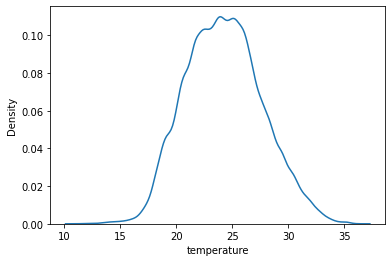

In [ ]:
kde = sns.kdeplot(train['temperature'])

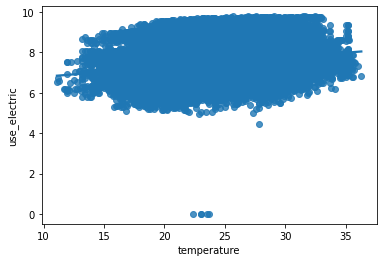

In [ ]:
x,y = train['temperature'], np.log1p(train['use_electric'])   # 시계열 데이터라서 상관도로 보기에는 힘듬.

fig = sns.regplot(x=x,y=y)

In [ ]:
# 시간 변수

date = train['date']
train['hour'] = date.dt.hour
train['day'] = date.dt.weekday
train['month'] = date.dt.month
train['week'] = date.dt.weekofyear # 1년 중 몇번째 주
train['dayofyear'] = date.dt.dayofyear  # 1년 중 몇번째 날

In [ ]:
train['week'].unique()

array([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])

In [ ]:
# 공휴일 변수 추가

train['holiday'] = train.apply(lambda x : 0 if x['day']<5 else 1, axis = 1)
train['holiday'].unique()

array([0, 1])

In [ ]:
# 공휴일 변수 추가

train['holiday'] = train.apply(lambda x : 0 if x['day']<5 else 1, axis = 1)
train.loc[('2020-08-17'<=train['date'])&(train['date']<'2020-08-18'), 'holiday'] = 1

In [ ]:
# 시간을 sin, cos 함수로

train['sin_time'] = np.sin(2*np.pi*train.hour/24)
train['cos_time'] = np.cos(2*np.pi*train.hour/24)

In [ ]:
# THI(temperature-humidity index) : 불쾌지수

train['THI'] = 9/5*train['temperature'] - 0.55*(1-train['humidity']/100)*(9/5*train['humidity']-26)+32

In [ ]:
# CDH(Cooling Degree Hour) : 냉방 도일

def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11:
            ys.append(np.sum(xs[:(i+1)]-26))
        else:
            ys.append(np.sum(xs[(i-11):(i+1)]-26))
    return np.array(ys)

cdhs = np.array([])
for num in range(1,61,1):
    temp = train[train['num'] == num]
    cdh = CDH(temp['temperature'].values)
    cdhs = np.concatenate([cdhs, cdh])
train['CDH'] = cdhs

In [ ]:
# 체감 온도

train['body_temperature'] = 13.12 + 0.6215*train['temperature'] - 11.37*(train['wind_speed']*3.6)**0.16 + 0.3965*(train['wind_speed']*3.6)**0.16*train['temperature']

In [ ]:
# 화씨로 변형

train['temperature_F'] = (train['temperature'] * 9/5) + 32 

# 열지수

T = train['temperature_F']
RH = train['humidity']
train['heat_index'] = -42.379 + 2.04901523*T + 10.14333127*RH - .22475541*T*RH - .00683783*T*T - .05481717*RH*RH + .00122874*T*T*RH + .00085282*T*RH*RH - .00000199*T*T*RH*RH
train['heat_index'] = (train['heat_index']-32) * 5/9
train.loc[train['heat_index']<32, 'heat_index'] = 0
train.loc[(train['heat_index']>=32) & (train['heat_index']<41), 'heat_index'] = 1
train.loc[(train['heat_index']>=41) & (train['heat_index']<54), 'heat_index'] = 2
train.loc[(train['heat_index']>=54) & (train['heat_index']<66), 'heat_index'] = 3
train.loc[train['heat_index']>=66, 'heat_index'] = 4

In [ ]:
train.columns

Index(['num', 'date', 'use_electric', 'temperature', 'wind_speed', 'humidity',
       'precipitation', 'sunshine', 'operation', 'solar_power', 'hour', 'day',
       'month', 'week', 'dayofyear', 'holiday', 'sin_time', 'cos_time', 'THI',
       'CDH', 'body_temperature', 'temperature_F', 'heat_index'],
      dtype='object')

In [ ]:
train.corr()

,num,use_electric,temperature,wind_speed,humidity,precipitation,sunshine,operation,solar_power,hour,...,week,dayofyear,holiday,sin_time,cos_time,THI,CDH,body_temperature,temperature_F,heat_index
num,1.000000e+00,-0.063193,0.000363,-0.052184,0.005379,-0.004673,-0.013685,6.103135e-02,9.918068e-02,-1.864340e-15,...,-2.176205e-14,-7.365699e-14,2.361091e-15,1.558437e-19,8.547108e-18,0.012133,0.000415,0.008422,0.000363,-0.022479
use_electric,-6.319335e-02,1.000000,0.158361,0.109965,-0.077199,-0.006028,0.112131,1.507991e-01,1.163441e-01,9.147217e-02,...,6.054924e-02,5.609129e-02,-7.150802e-02,-1.002120e-01,-1.950802e-01,0.089470,0.041269,0.145723,0.158361,0.093187
temperature,3.631250e-04,0.158361,1.000000,0.167455,-0.509105,-0.093788,0.515657,1.906651e-02,2.586485e-02,2.997718e-01,...,3.970669e-01,3.999718e-01,7.228264e-02,-3.898569e-01,-3.676551e-01,0.560367,0.667055,0.985736,1.000000,0.552098
wind_speed,-5.218413e-02,0.109965,0.167455,1.000000,-0.110439,0.083433,0.156381,6.274912e-03,-7.655996e-02,1.540747e-01,...,3.628025e-02,3.496125e-02,-2.034679e-02,-2.070265e-01,-1.857481e-01,0.065033,0.031380,0.074512,0.167455,0.114513
humidity,5.378530e-03,-0.077199,-0.509105,-0.110439,1.000000,0.208862,-0.627597,-3.140481e-02,-2.065729e-02,-2.603125e-01,...,3.395022e-01,3.404332e-01,-2.422081e-02,3.408332e-01,3.178028e-01,0.325783,-0.143657,-0.492487,-0.509105,-0.203578
precipitation,-4.673261e-03,-0.006028,-0.093788,0.083433,0.208862,1.000000,-0.112646,-3.559549e-03,-1.668520e-02,-2.218069e-02,...,8.642093e-02,8.497088e-02,-1.199023e-02,3.620632e-02,-5.170381e-03,0.155578,-0.039229,-0.107031,-0.093788,-0.061485
sunshine,-1.368529e-02,0.112131,0.515657,0.156381,-0.627597,-0.112646,1.000000,-5.694932e-03,-8.412045e-03,1.617544e-01,...,-1.343174e-01,-1.337696e-01,3.528814e-02,-2.021759e-01,-4.925586e-01,0.006842,0.007814,0.506081,0.515657,0.314021
operation,6.103135e-02,0.150799,0.019067,0.006275,-0.031405,-0.003560,-0.005695,1.000000e+00,8.484178e-02,6.172320e-16,...,-3.890250e-15,-6.021126e-15,3.615573e-17,-1.007202e-18,2.599008e-18,-0.009674,0.022738,0.014863,0.019067,0.004559
solar_power,9.918068e-02,0.116344,0.025865,-0.076560,-0.020657,-0.016685,-0.008412,8.484178e-02,1.000000e+00,1.085166e-15,...,-2.036105e-15,-1.395337e-14,6.006651e-16,-2.016971e-18,2.416771e-18,0.013759,0.030872,0.036508,0.025865,0.021518
hour,-1.864340e-15,0.091472,0.299772,0.154075,-0.260312,-0.022181,0.161754,6.172320e-16,1.085166e-15,1.000000e+00,...,-8.488862e-17,-9.356466e-17,2.214367e-18,-7.759122e-01,-1.021508e-01,0.058027,0.222830,0.274578,0.299772,0.143056


## 데이터들의 경향, 주기, 계절성, 불규칙성을 파악 (시계열데이터 정상성 확인)

저희가 배웠던 관점으로 확인해보고 insight를 얻을 수도 있을 것 같아요

시계열 데이터의 계절성을 테스트하는 방법
일반적인 방법은 고정된 시간 구간에서 반복적인 패턴을 체크하고 계열 데이터를 도표화하는 것이다. 계절성의 타입은 달력이나 시계로 정의된다.
1. 하루 중 시간 마다 반복
2. 월 중 일 마다 반복
3. 주 마다 반복
4. 월 마다 반복
5. 연 마다 반복

자료
https://post.naver.com/viewer/postView.nhn?volumeNo=28094462

In [ ]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정

use_electric=train['use_electric']
use_electric.index=train['date']
use_electric

date
2020-06-01 00:00:00    8179.056
2020-06-01 01:00:00    8135.640
2020-06-01 02:00:00    8107.128
2020-06-01 03:00:00    8048.808
2020-06-01 04:00:00    8043.624
                         ...   
2020-08-24 19:00:00    4114.368
2020-08-24 20:00:00    3975.696
2020-08-24 21:00:00    3572.208
2020-08-24 22:00:00    3299.184
2020-08-24 23:00:00    3204.576
Name: use_electric, Length: 122400, dtype: float64

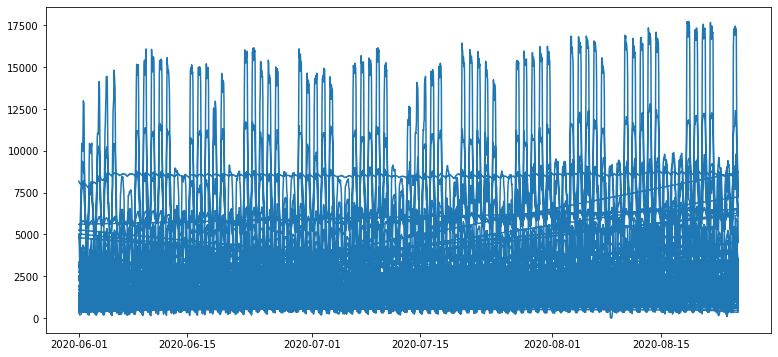

In [ ]:
plt.plot(use_electric)  # 그래프가 너무 더러워서... 이건 다른 시각화 방법 써보는 게 좋을 것 같습니다 ㅎ..

In [ ]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

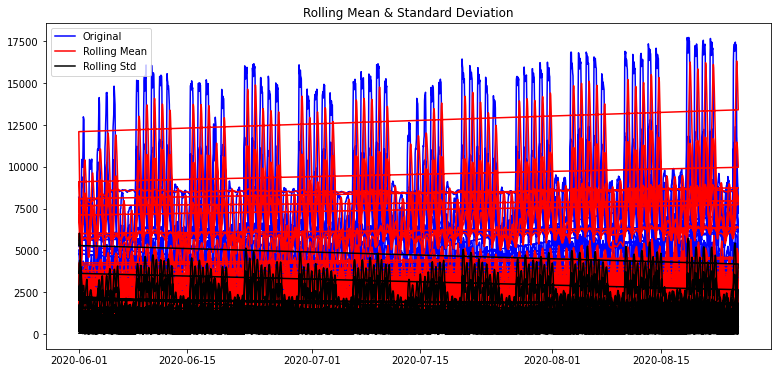

In [ ]:
plot_rolling_statistics(use_electric, window=12)

대체적으로 안정적이긴 한데 중간에 빨간선이 왜 그어졌는지는 모르겠음

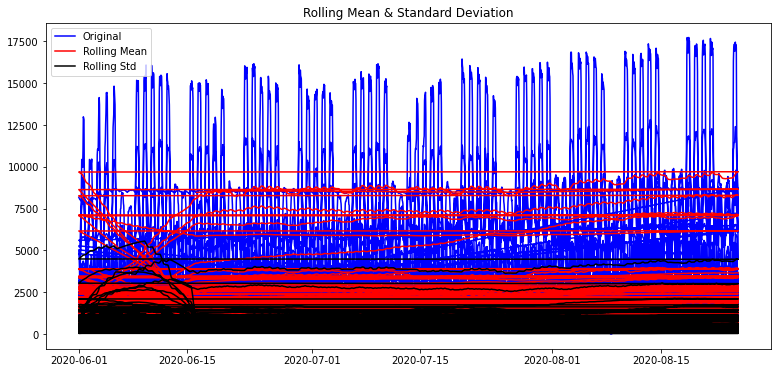

In [ ]:
plot_rolling_statistics(use_electric, window=365)  # 이건 mean 값이 중구난방 ㅋㅋ

In [ ]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
augmented_dickey_fuller_test(use_electric)

Results of Dickey-Fuller Test:
Test Statistic                -6.759891e+00
p-value                        2.809658e-09
#Lags Used                     7.100000e+01
Number of Observations Used    1.223280e+05
Critical Value (1%)           -3.430403e+00
Critical Value (5%)           -2.861564e+00
Critical Value (10%)          -2.566783e+00
dtype: float64


p-value가 거의 0에 가까워서 귀무가설은 기각될 수 있음

따라서 안정적인 데이터라고 볼 수 있음. 하지만 윗 그래프를 보면 이동 평균값과 이동 표준편차 선이 좀 일그러져서 이상치나 또 다른 확인이 필요할 것 같아요 예를 들어 군집화..ㅎ.ㅎ

# 2.모델링 전략 수립

# 3. 전처리

In [ ]:
test.columns

Index(['num', 'date', 'temperature', 'wind_speed', 'humidity', 'precipitation',
       'sunshine', 'operation', 'solar_power'],
      dtype='object')

In [ ]:
test.head()

,num,date,temperature,wind_speed,humidity,precipitation,sunshine,operation,solar_power
0,1,2020-06-01 00:00:00,27.8,1.5,74.0,0.0,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1,2020-06-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1,2020-06-01 03:00:00,27.3,1.1,78.0,NaN,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
# test 데이터 전처리
test.columns = ['num', 'date', 'temperature', 'wind_speed', 'humidity', 'precipitation', 'sunshine', 'operation', 'solar_power']
test['date']= pd.to_datetime(train['date'])

In [ ]:
# 건물별 비전기냉방성비 운영과 태양광 보유를 판단해 test set의 결측치를 보간합니다.
test_fill = test.copy()
sp_dict = train[['num', 'solar_power']].drop_duplicates().set_index('num').to_dict()['solar_power']
test['solar_power'] = test['num'].map(sp_dict)

op_dict = train[['num', 'operation']].drop_duplicates().set_index('num').to_dict()['operation']
test['operation'] = test['num'].map(sp_dict)


In [ ]:
test_fill.head()

,num,date,temperature,wind_speed,humidity,precipitation,sunshine,operation,solar_power
0,1,2020-06-01 00:00:00,27.8,1.5,74.0,0.0,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1,2020-06-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1,2020-06-01 03:00:00,27.3,1.1,78.0,NaN,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
# pandas 선형보간 linear interpolation 사용
#for i in range(60):
#  for i in range(60):
#    test_fill.iloc[i*168:(i+1)*168, :]  = test_fill.iloc[i*168:(i+1)*168, :].interpolate()


In [ ]:
# temperature 컬럼을 linear interpolation 사용용
test_fill['temperature'] = test_fill['temperature'].interpolate(method='values')

In [ ]:
test_fill.head(10)


,num,date,temperature,wind_speed,humidity,precipitation,sunshine,operation,solar_power
0,1,2020-06-01 00:00:00,27.800000,1.5,74.0,0.0,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,27.633333,NaN,NaN,NaN,NaN,0.0,0.0
2,1,2020-06-01 02:00:00,27.466667,NaN,NaN,NaN,NaN,0.0,0.0
3,1,2020-06-01 03:00:00,27.300000,1.1,78.0,NaN,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,26.900000,NaN,NaN,NaN,NaN,0.0,0.0
5,1,2020-06-01 05:00:00,26.500000,NaN,NaN,NaN,NaN,0.0,0.0
6,1,2020-06-01 06:00:00,26.100000,1.3,83.0,0.0,0.0,0.0,0.0
7,1,2020-06-01 07:00:00,27.000000,NaN,NaN,NaN,NaN,0.0,0.0
8,1,2020-06-01 08:00:00,27.900000,NaN,NaN,NaN,NaN,0.0,0.0
9,1,2020-06-01 09:00:00,28.800000,1.2,77.0,NaN,1.1,0.0,0.0


In [ ]:
# 'wind_speed', 'humidity' 컬럼 linear interpolation
test_fill['wind_speed'] = test_fill['wind_speed'].interpolate(method='values')
test_fill['humidity'] = test_fill['humidity'].interpolate(method='values')

# 'precipitation', 'sunshine' 컬럼 linear interpolation
test_fill['precipitation'] = test_fill['precipitation'].interpolate(method='values')
test_fill['sunshine'] = test_fill['sunshine'].interpolate(method='values')


In [ ]:
test_fill.head(20)

,num,date,temperature,wind_speed,humidity,precipitation,sunshine,operation,solar_power
0,1,2020-06-01 00:00:00,27.800000,1.500000,74.000000,0.0,0.000000,0.0,0.0
1,1,2020-06-01 01:00:00,27.633333,1.366667,75.333333,0.0,0.000000,0.0,0.0
2,1,2020-06-01 02:00:00,27.466667,1.233333,76.666667,0.0,0.000000,0.0,0.0
3,1,2020-06-01 03:00:00,27.300000,1.100000,78.000000,0.0,0.000000,0.0,0.0
4,1,2020-06-01 04:00:00,26.900000,1.166667,79.666667,0.0,0.000000,0.0,0.0
5,1,2020-06-01 05:00:00,26.500000,1.233333,81.333333,0.0,0.000000,0.0,0.0
6,1,2020-06-01 06:00:00,26.100000,1.300000,83.000000,0.0,0.000000,0.0,0.0
7,1,2020-06-01 07:00:00,27.000000,1.266667,81.000000,0.0,0.366667,0.0,0.0
8,1,2020-06-01 08:00:00,27.900000,1.233333,79.000000,0.0,0.733333,0.0,0.0
9,1,2020-06-01 09:00:00,28.800000,1.200000,77.000000,0.0,1.100000,0.0,0.0


# 4. Normalization

# 5.모델링

# 6.하이퍼 파라미터 

# 7.훈련 및 예측 Blending

# 8. 파일 출력 및 제출

# 9.회고